<a href="https://colab.research.google.com/github/EniolaWebsterEsho/Prediction-Codes/blob/main/Prediction_of_Pressure_using_LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### **Loading the Data**

The data is gotten from National Oceanic and Atmospheric Administration and it shows the U.S. Hourly Climate Normals for temperature, pressure and dew point for January 2010.

The data is available at https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00824/html

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NORMAL_HLY_sample_csv.csv to NORMAL_HLY_sample_csv.csv


In [ ]:
df=pd.read_csv('NORMAL_HLY_sample_csv.csv', index_col='DATE')

### **Data Visualization**

In [ ]:
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HLY-TEMP-NORMAL,HLY-PRES-NORMAL,HLY-DEWP-NORMAL
DATE,,,,,,,,
20100101 00:00,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,349,10205,289
20100101 01:00,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,344,10202,287
20100101 02:00,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,339,10200,284
20100101 03:00,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,334,10202,283
20100101 04:00,GHCND:USW00003812,ASHEVILLE REGIONAL AIRPORT NC US,645.3,35.43194,-82.5375,331,10202,280


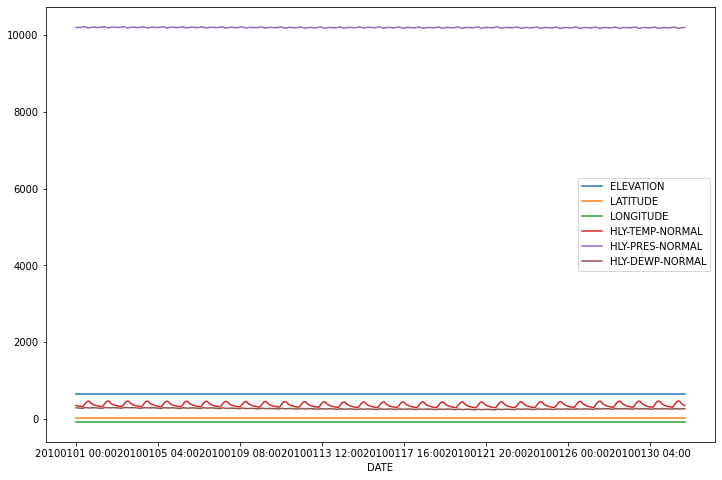

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
df.drop(['STATION','STATION_NAME','ELEVATION','LATITUDE','LONGITUDE','HLY-TEMP-NORMAL','HLY-DEWP-NORMAL'], axis = 1, inplace=True)

In [ ]:
df

,HLY-PRES-NORMAL
DATE,
20100101 00:00,10205
20100101 01:00,10202
20100101 02:00,10200
20100101 03:00,10202
20100101 04:00,10202
...,...
20100131 19:00,10195
20100131 20:00,10199
20100131 21:00,10200


### **Splitting the Data**

In [ ]:
len(df)

744

In [ ]:
test_size=50
test_ind=len(df)-test_size

In [ ]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [ ]:
train

,HLY-PRES-NORMAL
DATE,
20100101 00:00,10205
20100101 01:00,10202
20100101 02:00,10200
20100101 03:00,10202
20100101 04:00,10202
...,...
20100129 17:00,10184
20100129 18:00,10190
20100129 19:00,10195


In [ ]:
test

,HLY-PRES-NORMAL
DATE,
20100129 22:00,10200
20100129 23:00,10199
20100130 00:00,10197
20100130 01:00,10194
20100130 02:00,10192
20100130 03:00,10192
20100130 04:00,10191
20100130 05:00,10191
20100130 06:00,10195


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length=30
generator=TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1) #batch_size is the number of time series samples in each batch

In [ ]:
X,y=generator[0]

In [ ]:
X

array([[[0.61904762],
        [0.54761905],
        [0.5       ],
        [0.54761905],
        [0.54761905],
        [0.5       ],
        [0.57142857],
        [0.69047619],
        [0.80952381],
        [0.9047619 ],
        [1.        ],
        [0.97619048],
        [0.76190476],
        [0.5       ],
        [0.33333333],
        [0.26190476],
        [0.30952381],
        [0.4047619 ],
        [0.52380952],
        [0.64285714],
        [0.71428571],
        [0.76190476],
        [0.73809524],
        [0.71428571],
        [0.64285714],
        [0.54761905],
        [0.52380952],
        [0.54761905],
        [0.54761905],
        [0.5       ]]])

In [ ]:
y

array([[0.5952381]])

In [ ]:
scaled_train

array([[0.61904762],
       [0.54761905],
       [0.5       ],
       [0.54761905],
       [0.54761905],
       [0.5       ],
       [0.57142857],
       [0.69047619],
       [0.80952381],
       [0.9047619 ],
       [1.        ],
       [0.97619048],
       [0.76190476],
       [0.5       ],
       [0.33333333],
       [0.26190476],
       [0.30952381],
       [0.4047619 ],
       [0.52380952],
       [0.64285714],
       [0.71428571],
       [0.76190476],
       [0.73809524],
       [0.71428571],
       [0.64285714],
       [0.54761905],
       [0.52380952],
       [0.54761905],
       [0.54761905],
       [0.5       ],
       [0.5952381 ],
       [0.69047619],
       [0.80952381],
       [0.9047619 ],
       [0.97619048],
       [0.95238095],
       [0.76190476],
       [0.5       ],
       [0.33333333],
       [0.26190476],
       [0.30952381],
       [0.4047619 ],
       [0.52380952],
       [0.64285714],
       [0.71428571],
       [0.73809524],
       [0.71428571],
       [0.714

### **Building the Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
n_features=1

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features))) #LSTM atands for long short term memory used to predict long sequences of data
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

### **Training the model**

In [ ]:
model.fit_generator(generator,epochs=30,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/30
664/664 [==============================] - 9s 12ms/step - loss: 0.0328 - val_loss: 0.0151
Epoch 2/30
664/664 [==============================] - 8s 12ms/step - loss: 0.0062 - val_loss: 0.0042
Epoch 3/30
664/664 [==============================] - 8s 12ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 4/30
664/664 [==============================] - 8s 12ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 5/30
664/664 [==============================] - 8s 12ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 6/30
664/664 [==============================] - 8s 12ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 7/30
664/664 [==============================] - 8s 12ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 8/30
664/664 [==============================] - 8s 12ms/step - loss: 0.0014 - val_loss: 0.0012


In [ ]:
losses=pd.DataFrame(model.history.history)

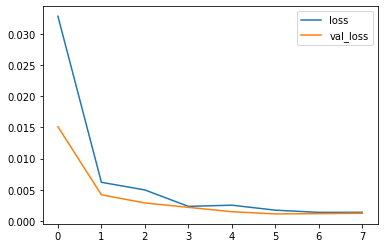

In [ ]:
losses.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions']=true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test

,HLY-PRES-NORMAL,Predictions
DATE,,
20100129 22:00,10200,10201.617839
20100129 23:00,10199,10201.055612
20100130 00:00,10197,10198.560687
20100130 01:00,10194,10194.749872
20100130 02:00,10192,10191.273988
20100130 03:00,10192,10189.917889
20100130 04:00,10191,10190.487334
20100130 05:00,10191,10192.128660
20100130 06:00,10195,10194.723793


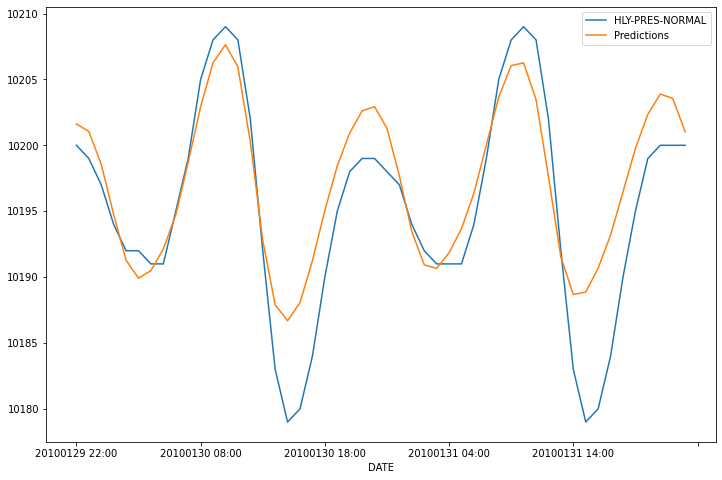

In [ ]:
test.plot(figsize=(12,8))

### **Evaluation of Model**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = sqrt(mean_squared_error(y_test, predictions))
print(mse)